<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 06 - PID controller homework

In this exercise you will have to write the code for a PID controller tasked to command the angular speed of your Duckiebot to compensate an initial tracking error of $0.2 \text{m}$. 

Your robot will have to rely on its own odometry to estimate its current position.

**Note**: the function(s) used to compute the odometry will be taken from your previous answers in the [odometry activity](../04-Odometry/odometry_activity.ipynb). Make sure you're happy about them, too!

The Duckiebot's speed is constant and given: $v_0 = 0.2$. 

May the duck be with you!

⚠️ ***WARNING:***
- DO NOT CHANGE THE NAME OF THE FOLLOWING FUNCTION
- DO NOT CHANGE THE ARGUMENTS OF THE FUNCTION
- DO NOT CREATE NEW CODE CELLS, THEY WILL NOT BE CONSIDERED

In [116]:
import numpy as np

# Lateral control

# TODO: write the PID controller using what you've learned in the previous activities

# Note: y_hat will be calculated based on your DeltaPhi() and poseEstimate() functions written previously 
global errors

def PIDController(
    v_0, # assume given (by the scenario)
    y_ref, # assume given (by the scenario)
    y_hat, # assume given (by the odometry)
    prev_e_y, # assume given (by the previous iteration of this function)
    prev_int_y, # assume given (by the previous iteration of this function)
    delta_t): # assume given (by the simulator)
    """
    Args:
        v_0 (:double:) linear Duckiebot speed.
        y_ref (:double:) reference lateral pose
        y_hat (:double:) the current estiamted pose along y.
        prev_e_y (:double:) tracking error at previous iteration.
        prev_int_y (:double:) previous integral error term.
        delta_t (:double:) time interval since last call.
    returns:
        v_0 (:double:) linear velocity of the Duckiebot 
        omega (:double:) angular velocity of the Duckiebot
        e_y (:double:) current tracking error (automatically becomes prev_e_y at next iteration).
        e_int_y (:double:) current integral error (automatically becomes prev_int_y at next iteration).
    """
    
    #if prev_e_y == 0.0:
    #    printf('resetting errors')
    #x[:-1] = x[1:]; x[-1] = newvalue
    
    # TODO: these are random values, you have to implement your own PID controller in here
    omega = np.random.uniform(-8.0, 8.0)
    e_y = y_ref - y_hat
    e_der = (e_y - prev_e_y)/delta_t  if prev_e_y != 0 else 0 
    e_int_y = prev_int_y*0.8 + e_y * delta_t

    # anti-windup - preventing the integral error from growing too much
    e_int_y = max(min(e_int_y,0.06),-0.06)
    
    k_p = 2.51
    k_i = -0.0
    k_d = 10.0
    
    #quite good
    #k_p = 3
    #k_i = 0.5
    #k_d = 10.0
    
    #if e_y < 0.01:
    #    e_y = 0
    
    e_y_2 = e_y
    if (e_y_2 < 0):
        e_y_2 = -2**(-e_y_2*0.5)-1
    else:
        e_y_2 = 2**(e_y_2*0.5)-1
        
    #if e_int_y > 0.03:
    #    k_d = 0
    
    if abs(e_y) < 0.06:
        #break
        k_d *= 1
        k_p /= 4
        
    
    
    if abs(e_y) < 0.08 and abs(e_y) > 0.01:
        k_d *= 4
    
    if abs(e_y) < 0.01:
        k_d *= 1
    #else:
    #    k_d = 0
    
    #e_y**3 is pretty ood
    omega = k_p*e_y + k_i*e_int_y+k_d*e_der
    
    #omega = max(min(omega, np.pi/2), -np.pi/2)
    
    #omega = 0.0001 #-3.14/2
    
    if abs(e_y) > 0.2:
        v_0 = 0.03
    elif abs(e_y) > 0.1:
        v_0 = 0.1
    elif abs(e_y) > 0.05:
        v_0 = 0.2
    elif abs(omega) < 0.07 and abs(e_int_y) < 0.0005:
        v_0 = 0.6
    else:
        v_0 =0.075
        
    if abs(e_y) < 0.05 and abs (e_der) > 0.007:
        print('break')
        v_0 = -0.22
        omega = omega
        
    if abs(e_y) < 0.01 and abs (e_der) > 0.003:
        print('break')
        v_0 = -0.37
        omega = omega
               
    print(f'omega={omega} y_ref {y_ref} y_hat {y_hat} v_0 {v_0} e_y {e_y} e_int_y {e_int_y} e_der {e_der} k_d {k_d} k_p {k_p}')
    
    #e_y = 0
    
    
    return [v_0, omega], e_y, e_int_y


### Sanity Check

test
omega=0.7529999999999999 y_ref -0.0 y_hat -0.3 v_0 0.03 e_y 0.3 e_int_y 0.06 e_der 0 k_d 10.0 k_p 2.51
omega=0.8094050574035395 y_ref -0.0 y_hat -0.3010741774405549 v_0 0.03 e_y 0.3010741774405549 e_int_y 0.06 e_der 0.005370887202774677 k_d 10.0 k_p 2.51
omega=0.764957615039679 y_ref -0.0 y_hat -0.30125055202946915 v_0 0.03 e_y 0.30125055202946915 e_int_y 0.06 e_der 0.0008818729445711493 k_d 10.0 k_p 2.51
omega=0.7145214074328606 y_ref -0.0 y_hat -0.3004579891240967 v_0 0.03 e_y 0.3004579891240967 e_int_y 0.06 e_der -0.003962814526862202 k_d 10.0 k_p 2.51
omega=0.6654252247160193 y_ref -0.0 y_hat -0.2987683237653943 v_0 0.03 e_y 0.2987683237653943 e_int_y 0.06 e_der -0.00844832679351204 k_d 10.0 k_p 2.51
omega=0.6190341958657736 y_ref -0.0 y_hat -0.29627595475405616 v_0 0.03 e_y 0.29627595475405616 e_int_y 0.06 e_der -0.012461845056690735 k_d 10.0 k_p 2.51
omega=0.5759070782855984 y_ref -0.0 y_hat -0.293081409559863 v_0 0.03 e_y 0.293081409559863 e_int_y 0.06 e_der -0.015972725970

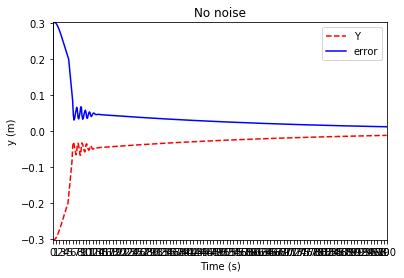

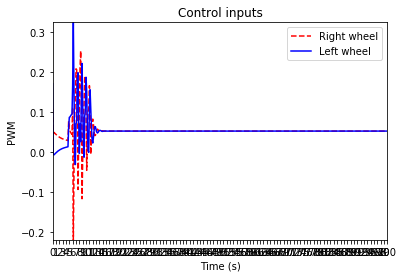

omega=0.5009085329304743 y_ref -0.0 y_hat -0.199565152561942 v_0 0.1 e_y 0.199565152561942 e_int_y 0.0399130305123884 e_der 0 k_d 10.0 k_p 2.51
omega=0.610566479495765 y_ref -0.0 y_hat -0.20165347757746838 v_0 0.03 e_y 0.20165347757746838 e_int_y 0.06 e_der 0.010441625077631939 k_d 10.0 k_p 2.51
omega=0.577586789030157 y_ref -0.0 y_hat -0.20301391483343317 v_0 0.03 e_y 0.20301391483343317 e_int_y 0.06 e_der 0.006802186279823985 k_d 10.0 k_p 2.51
omega=0.06473986148907024 y_ref -0.0 y_hat -0.1945426700278181 v_0 0.1 e_y 0.1945426700278181 e_int_y 0.06 e_der -0.04235622402807532 k_d 10.0 k_p 2.51
omega=0.42738446704359895 y_ref -0.0 y_hat -0.19338255510254246 v_0 0.1 e_y 0.19338255510254246 e_int_y 0.06 e_der -0.005800574626378258 k_d 10.0 k_p 2.51
omega=-0.3612840036804181 y_ref -0.0 y_hat -0.17725849840881175 v_0 0.1 e_y 0.17725849840881175 e_int_y 0.06 e_der -0.08062028346865355 k_d 10.0 k_p 2.51
omega=0.3614205127221092 y_ref -0.0 y_hat -0.17566835713507326 v_0 0.1 e_y 0.175668357135

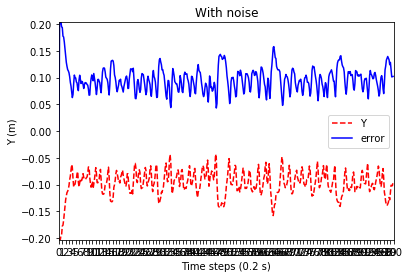

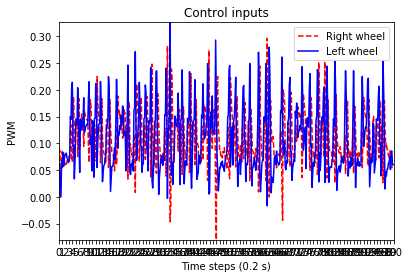

In [117]:
import sys
sys.path.append('../')
#from unit_test import UnitTestPositionPID

class UnitTestMessage:
    # Test the WheelEncoderStamped messages
    def __init__(self, callback):
        from duckietown_msgs.msg import WheelEncoderStamped
        from std_msgs.msg import Header

        # creating a dummy wheel encoder message to allow testing how to read fields

        header = Header()
        header.seq = 372
        # rospy.Time.now() is the correct stamp, anyway this works only when a node is initialized
        header.stamp.secs = 1618436796
        header.stamp.nsecs = 55785179
        header.frame_id = f"agent/left_wheel_axis"

        encoder_msg = WheelEncoderStamped(
            header=header, data=4, resolution=135, type=WheelEncoderStamped.ENCODER_TYPE_INCREMENTAL
        )

        callback(encoder_msg)


class UnitTestOdometry:
    # Test the odometry
    def __init__(self, R, baseline_wheel2wheel, poseEstimation):
        x_prev = y_prev = theta_prev = 0  # initial conditions

        # to store the estimates, so we can plot them
        x_prev_ = []
        y_prev_ = []
        theta_prev_ = []

        x, y, robot_rotation = poseEstimation(
            R,
            baseline_wheel2wheel,
            x_prev,
            y_prev,
            theta_prev,
            5 * np.pi / 180,  # wheel rotates of 5 degree
            10 * np.pi / 180,
        )  # wheel rotates of 10 degree
        # given how much the robot rotates with wheels rotation of 5 and 10 degree,
        # calculate the number of steps required to do a circle.
        # this is indipendent fro R and the baseline int this way!
        steps4circle = int(2 * np.pi / robot_rotation)

        # iterate steps4circle times the pose estiamtion.
        for _ in range(0, steps4circle):
            # save the current values of y, x and theta
            x_prev_.append(x_prev)
            y_prev_.append(y_prev)
            theta_prev_.append(theta_prev)
            x_prev, y_prev, theta_prev = poseEstimation(
                R,
                baseline_wheel2wheel,
                x_prev,
                y_prev,
                theta_prev,
                5 * np.pi / 180,  # wheel rotates of 5 degree
                10 * np.pi / 180,
            )  # wheel rotates of 10 degree
        # plot the results
        self.plot(x_prev_, y_prev_, theta_prev_)

    def plot(self, x, y, theta):
        import matplotlib.pyplot as plt

        figure, axes = plt.subplots(1)

        axes.plot(x, y, "r")
        axes.set_aspect(1)

        plt.xlabel("X position")
        plt.ylabel("Y position")

        plt.title("Am I a circle?")
        plt.show()


class UnitTestHeadingPID:
    def __init__(self, R, baseline, v_0, theta_ref, gain, trim, PIDController):
        self.R = R  # wheel radius
        # distance from wheel to wheel (notice, this is 2*L as defined in the theory)
        self.L = baseline
        self.v_0 = v_0  # fixed robot linear speed
        self.PIDController = PIDController  # controller being used
        self.delta_t = 0.02  # unit test simulation time step
        self.t1 = np.arange(0.0, 10.0, self.delta_t)  # time vector
        self.theta_prev = 0  # theta initial condition of the Duckiebot
        self.theta_ref = theta_ref  # theta ref, the goal the Duckiebot has to reach
        # motor constants (scaled to simulate hardware setup)
        self.k_r_inv = (gain + trim) / 27.0
        self.k_l_inv = (gain - trim) / 27.0

    def test(self):
        omega = -0.3  # initial command
        prev_e = 0  # initializing error (TODO, should be theta_ref - theta_0)
        prev_int = 0  # initializing integral term

        err_ = []
        theta_hat_ = []
        u_r_ = []
        u_l_ = []

        for _ in self.t1:
            theta_hat, u_r, u_l = self.sim(
                omega, self.v_0, self.delta_t)  # simulate driving

            # For plotting
            theta_hat_.append(theta_hat)
            err_.append(prev_e)
            u_r_.append(u_r)
            u_l_.append(u_l)

            # Calculating wheel commands
            u, prev_e, prev_int = self.PIDController(
                self.v_0, self.theta_ref, theta_hat, prev_e, prev_int, self.delta_t
            )

            self.v_0 = u[0]
            omega = u[1]

        # plot the theta_hat and the error on theta
        self.plot_pose(theta_hat_, err_, "Duckiebot heading (Theta)",
                       "Time (s)", "Theta (Degree)")
        # plot the control inputs
        self.plot_input(u_r_, u_l_, "Control inputs", "Time (s)", "PWM")

        # reset everything for simulation wiht noise
        self.theta_prev = 0
        omega = 0
        prev_e = 0
        prev_int = 0

        err_ = []
        theta_hat_ = []
        u_r_ = []
        u_l_ = []

        # simulate with noise
        for _ in self.t1:
            theta_hat, u_r, u_l = self.sim_noise(omega, self.v_0, self.delta_t)

            theta_hat_.append(theta_hat)
            err_.append(prev_e)
            u_r_.append(u_r)
            u_l_.append(u_l)

            u, prev_e, prev_int = self.PIDController(
                self.v_0, self.theta_ref, theta_hat, prev_e, prev_int, self.delta_t
            )

            self.v_0 = u[0]
            omega = u[1]

        # plot theta with noise and the error on theta
        self.plot_pose(theta_hat_, err_, "Theta with noise",
                       "Time (s)", "Theta (Degree)")
        # plot the input to the wheels
        self.plot_input(u_r_, u_l_, "Control inputs", "Time (s)", "PWM")

    def plot_input(self, u_r, u_l, title, x_label, y_label):
        import matplotlib.pyplot as plt

        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(np.arange(0, len(u_l) + 1, 1))

        # plot the control inputs
        plt.axis([0, 10, np.min([np.min(u_r), np.min(u_l)]),
                 np.max([np.max(u_r), np.max(u_l)])])

        plt.plot(self.t1, (u_r), "r--", self.t1, (u_l), "b--")

        plt.legend(["Right wheel", "Left wheel"])
        plt.show()

    def plot_pose(self, theta_hat_, err_, title, x_label, y_label):
        import matplotlib.pyplot as plt

        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(np.arange(0, len(theta_hat_) + 1, 1))

        theta_hat_deg = []
        for el in theta_hat_:
            theta_hat_deg.append(el * 180 / np.pi)
        err_deg = []
        for el in err_:
            err_deg.append(el * 180 / np.pi)

        # plot the error and position
        plt.axis(
            [
                0,
                10,
                np.min([np.min(theta_hat_deg), np.min(err_deg)]),
                np.max([np.max(theta_hat_deg), np.max(err_deg)]),
            ]
        )
        plt.plot(self.t1, (theta_hat_deg), "r--", self.t1, (err_deg), "b")

        plt.legend(["Theta", "error"])
        plt.show()

    def sim(self, omega, v, time):
        omega_l = (v - 0.5 * omega * self.L) / self.R
        omega_r = (v + 0.5 * omega * self.L) / self.R

        delta_phi_left = time * omega_l
        delta_phi_right = time * omega_r

        self.theta_prev = self.theta_prev + self.R * \
            (delta_phi_right - delta_phi_left) / (self.L)

        u_r, u_l = self.wheel_inputs(omega_r, omega_l)

        return self.theta_prev, u_r, u_l

    def sim_noise(self, omega, v, time):
        omega_l = (v - 0.5 * omega * self.L) / self.R
        omega_r = (v + 0.5 * omega * self.L) / self.R

        delta_phi_left = time * omega_l
        delta_phi_right = time * omega_r

        # variance of the additive measurement noise
        measurement_noise_variance_deg = 0.5
        measurement_noise = np.random.normal(
            0, np.deg2rad(measurement_noise_variance_deg))

        self.theta_prev = (
            self.theta_prev + self.R *
            (delta_phi_right - delta_phi_left) / (self.L) + measurement_noise
        )

        u_r, u_l = self.wheel_inputs(omega_r, omega_l)

        return self.theta_prev, u_r, u_l

    def wheel_inputs(self, omega_r, omega_l):
        u_r = omega_r * self.k_r_inv
        u_l = omega_l * self.k_l_inv

        u_r = np.max([np.min([u_r, 1]), -1])
        u_l = np.max([np.min([u_l, 1]), -1])

        return u_r, u_l


class UnitTestPositionPID:
    def __init__(self, R, baseline, v_0, y_ref, gain, trim, PIDController):
        self.R = R
        self.L = baseline
        self.PIDController = PIDController
        self.delta_t = 0.2
        self.test_horizont = 100.0
        self.t1 = np.arange(0.0, self.test_horizont, self.delta_t)
        self.theta_prev = 0
        self.y_prev = 0
        self.y_ref = y_ref
        self.v_0 = v_0

        self.k_r_inv = (gain + trim) / 27.0  # from the kinematics node
        self.k_l_inv = (gain - trim) / 27.0  # from the kinematics node

    def test(self):
        omega = -0.9
        prev_e = 0
        prev_int = 0
        self.y_prev = -0.3

        err_ = []
        y_hat_ = []
        u_r_ = []
        u_l_ = []

        for _ in self.t1:
            y_hat, u_r, u_l = self.sim(omega, self.v_0, self.delta_t)

            y_hat_.append(y_hat)
            err_.append(prev_e)
            u_r_.append(u_r)
            u_l_.append(u_l)

            u, prev_e, prev_int = self.PIDController(
                self.v_0, self.y_ref, y_hat, prev_e, prev_int, self.delta_t
            )

            self.v_0 = u[0]
            omega = u[1]

        self.plot_pose(y_hat_, err_, "No noise", "Time (s)", "y (m)")
        self.plot_input(u_r_, u_l_, "Control inputs", "Time (s)", "PWM")

        self.theta_prev = 0
        self.y_prev = -0.2
        omega = 0
        prev_e = 0
        prev_int = 0

        err_ = []
        y_hat_ = []
        u_r_ = []
        u_l_ = []

        for _ in self.t1:
            y_hat, u_r, u_l = self.sim_noise(omega, self.v_0, self.delta_t)

            y_hat_.append(y_hat)
            err_.append(prev_e)
            u_r_.append(u_r)
            u_l_.append(u_l)

            u, prev_e, prev_int = self.PIDController(
                self.v_0, self.y_ref, y_hat, prev_e, prev_int, self.delta_t
            )

            self.v_0 = u[0]
            omega = u[1]

        self.plot_pose(y_hat_, err_, "With noise",
                       "Time steps (0.2 s)", "Y (m)")
        self.plot_input(u_r_, u_l_, "Control inputs",
                        "Time steps (0.2 s)", "PWM")

    def plot_input(self, u_r, u_l, title, x_label, y_label):
        import matplotlib.pyplot as plt

        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(np.arange(0, len(u_l) + 1, 1))

        # plot the control inputs
        plt.axis(
            [0, self.test_horizont, np.min([np.min(u_r), np.min(u_l)]), np.max([
                np.max(u_r), np.max(u_l)])]
        )

        plt.plot(self.t1, (u_r), "r--", self.t1, (u_l), "b")

        plt.legend(["Right wheel", "Left wheel"])
        plt.show()

    def plot_pose(self, y_hat_, err_, title, x_label, y_label):
        import matplotlib.pyplot as plt

        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.xticks(np.arange(0, len(y_hat_) + 1, 1))

        # plot the error and position
        plt.axis(
            [
                0,
                self.test_horizont,
                np.min([np.min(y_hat_), np.min(err_)]),
                np.max([np.max(y_hat_), np.max(err_)]),
            ]
        )
        plt.plot(self.t1, (y_hat_), "r--", self.t1, (err_), "b")

        plt.legend(["Y", "error"])
        plt.show()

    def sim(self, omega, v, time):
        omega_l = (v - 0.5 * omega * self.L) / self.R
        omega_r = (v + 0.5 * omega * self.L) / self.R

        delta_phi_left = time * omega_l
        delta_phi_right = time * omega_r

        self.y_prev = self.y_prev + self.R * \
            (delta_phi_right + delta_phi_left) * np.sin(self.theta_prev) / 2

        self.theta_prev = self.theta_prev + self.R * \
            (delta_phi_right - delta_phi_left) / (self.L)

        u_r, u_l = self.wheel_inputs(omega_r, omega_l)

        return self.y_prev, u_r, u_l

    def sim_noise(self, omega, v, time):
        omega_l = (v - 0.5 * omega * self.L) / self.R
        omega_r = (v + 0.5 * omega * self.L) / self.R

        delta_phi_left = time * omega_l
        delta_phi_right = time * omega_r

        # variance of the additive measurement noise
        # 0.5 cm variance
        measurement_noise_variance_m = 0.005
        measurement_noise = np.random.normal(0, measurement_noise_variance_m)

        self.y_prev = self.y_prev + self.R * \
            (delta_phi_right + delta_phi_left) * \
            np.sin(self.theta_prev) / 2 + measurement_noise

        self.theta_prev = self.theta_prev + self.R * \
            (delta_phi_right - delta_phi_left) / self.L

        u_r, u_l = self.wheel_inputs(omega_r, omega_l)

        return self.y_prev, u_r, u_l

    def wheel_inputs(self, omega_r, omega_l):
        u_r = omega_r * self.k_r_inv
        u_l = omega_l * self.k_l_inv

        u_r = np.max([np.min([u_r, 1]), -1])
        u_l = np.max([np.min([u_l, 1]), -1])

        return u_r, u_l

# Write here the values of the kinematics parameters you calculated during the activities.
# This test will give you an idea of the behavior of the controller you wrote above.
# Try to play with the parameters, change R, the baseline all the PID variables,
# What change in the resulting graphs? Why?

R = 0.0318
baseline = 0.1
gain = 0.6
trim = 0.0
v_0 = 0.2
y_ref = -0.0
print("test")
# unit test input R, baseline, v_0, gain, trim, PIDController
unit_test = UnitTestPositionPID(R, baseline, v_0, y_ref, gain, trim, PIDController) 
unit_test.test()


## Testing instructions and outcome examples

Here are some examples of stable outcomes (not necessarily the best you can get):

### 💻 Simulation 

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercises test --sim


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-sim-good.png" alt="pid-lateral-sim-1" style="width: 300px;"/>
  <figcaption> Simulation, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.1]$. </figcaption>
  </div>
</figure>

### 🚙 Duckiebot

0. Make sure your Duckiebot is powered on and connected to the network.

1. Write the controller above, save this page (`Ctrl-S`), run:


        dts exercises test -b ROBOTNAME


2. Click on the "PID Exercise" icon on the VNC desktop

3. Bring up the interaction panel (it might be hidden behind RVIZ, highlight it through the shortcut on the bottom bar of VNC) and type the desired reference position $y_{ref}$ (in **meters**) and Duckiebot linear speed ($v_0$). 

4. Press on `Send Commands` to start, `Stop` to stop. 

5. `Ctrl-C` on the computer terminal used to launch the simulator to close the instance. 

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-control/pid-lateral-real-good.png" alt="pid-lateral-real-1" style="width: 300px;"/>
  <figcaption> Duckiebot, lateral PID control. $v_{0} = 0.2$, $y_{ref} = [0.2, -0.2, 0.2]$. </figcaption>
  </div>
</figure>

# Local evaluation and remote submission of your homework exercise


⚠️ You must submit this homework for evaluation if you are pursuing a verified track in the MOOC, by following the `Remote evalutation` instructions below.⚠️ 

## Local evaluation

If you want (this is not necessary) you can evaluate your submission locally before shipping it to the cloud. This will provide you access to detailed performacne metrics of your controller on various episodes. Note that this will take a while to run (~30-60 minutes). 

1. Open a terminal, navigate to the exercise folder and run:


        dts challenges evaluate
        

2. The result of the simulation can be visualized in realtime at the link printed by the evaluator, for example:

<figure>
  <div style="text-align:center;">
  <img src="../images/pid-exercise/screen-aido-eval.png" alt="pid-lateral-real-1" style="width: 900px;"/>
  <figcaption> Visualize the simulation at the link printed during the evaluation. </figcaption>
  </div>
</figure>

3. The evaluation output is saved locally at the end of the evaluation process. 

## Remote submission (⚠️ This part is mandatory to submit your homework and receive an official evaluation ⚠️)

You can submit your agent for evaluation by: 

1. Opening a terminal on your computer, navigating to the exercise folder and running:


        dts challenges submit
        

2. The result of the submission can be visualized on the AI-DO challenges website.

After some processing, you should see something like this:

```

~        ## Challenge mooc-modcon - MOOC - ModCon
~        
~                Track this submission at:
~        
~                    https://challenges.duckietown.org/v4/humans/submissions/SUBMISSION-NUMBER
~        
~                You can follow its fate using:
~        
~                    $ dts challenges follow --submission SUBMISSION-NUMBER
~        
~                You can speed up the evaluation using your own evaluator:
~        
~                    $ dts challenges evaluator --submission SUBMISSION-NUMBER
~        
~                For more information, see the manual at https://docs.duckietown.org/daffy/AIDO/out/
~        

```

Congratulations, you have completed the modeling and control activities! 